# Advanced Regression Assignment

### Author - Aditya Kritwik

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.

### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#To display more rows
pd.options.display.max_rows = 4000

In [3]:
# reading the dataset
homes = pd.read_csv("train.csv")

In [4]:
# summary of the dataset: 1460 rows, 81 columns, few null values
print(homes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
homes.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:


In [6]:
homes['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [7]:
homes['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [8]:
homes['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [9]:
homes['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [10]:
homes['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

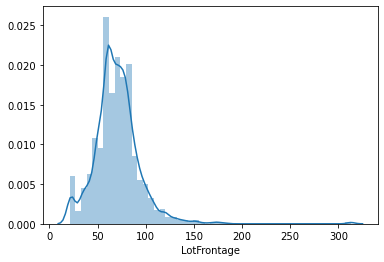

In [11]:
# LotFrontage: Linear feet of street connected to property
sns.distplot(homes['LotFrontage'])
plt.show()

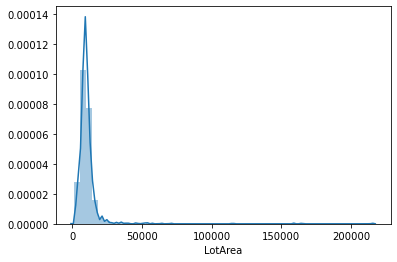

In [12]:
#LotArea: Lot size in square feet
sns.distplot(homes['LotArea'])
plt.show()

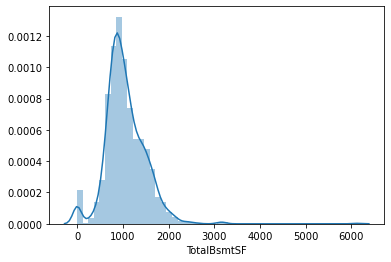

In [13]:
#TotalBsmtSF: Total square feet of basement area
sns.distplot(homes['TotalBsmtSF'])
plt.show()

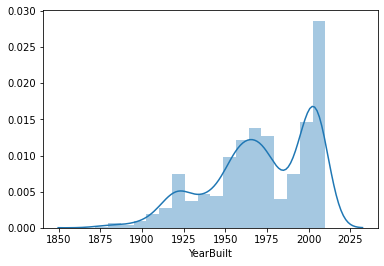

In [14]:
#YearBuilt: Original construction date
sns.distplot(homes['YearBuilt'])
plt.show()

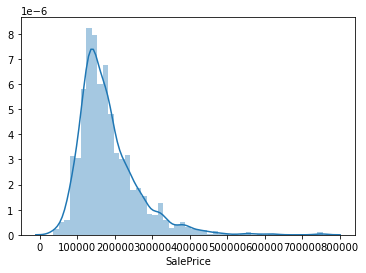

In [15]:
#Target Variable : SalePrice: Sale price of the house
sns.distplot(homes['SalePrice'])
plt.show()

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [16]:
# all numeric (float and int) variables in the dataset
homes_numeric = homes.select_dtypes(include=['float64', 'int64'])
homes_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


Here, although few variable are numeric (int), we'd rather treat it as categorical since it has only discrete values. Also, we do not want 'ID'.

In [17]:
# dropping categorical variables and ID 
homes_numeric = homes_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold','Id'], axis=1)
homes_numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000


This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [18]:
# correlation matrix
cor = homes_numeric.corr()
cor

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334
LowQualFinSF,0.038469,0.004779,-0.069071,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,0.134683,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.025606


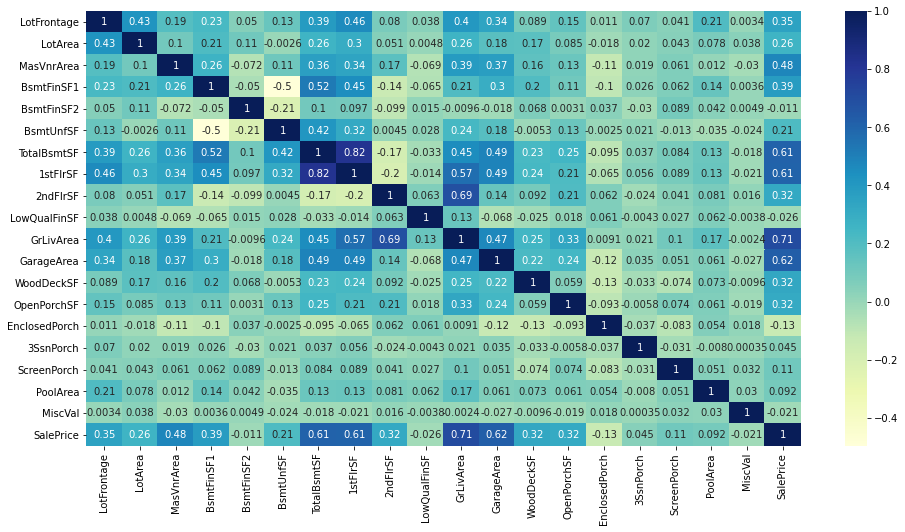

In [19]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of price with independent variables:

    SalePrice is highly (positively) correlated with GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF (notice how all of these variables represent the area of different parts of the house)

    SalePrice is not negatively correlated to any numerical variable.
    
Correlation among independent variables:

    Many independent variables are highly correlated : TotalBsmtSF, 1stFlrSF, GrLivArea, 2ndFlrSF etc. are all measures of 'area', and are positively correlated

Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).


### 2. Data Cleaning

Let's now conduct some data cleaning steps.

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except symboling, which should rather be a categorical variable (so that dummy variable are created for the categories).

Note that it can be used in the model as a numeric variable also.


In [20]:
# variable formats
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [21]:
#converting from int type to object to treat the variables as categorical variables
homes['MSSubClass'] = homes['MSSubClass'].astype('object')
homes['OverallQual'] = homes['OverallQual'].astype('object')
homes['OverallCond'] = homes['OverallCond'].astype('object')
homes['BsmtFullBath'] = homes['BsmtFullBath'].astype('object')
homes['BsmtHalfBath'] = homes['BsmtHalfBath'].astype('object')
homes['FullBath'] = homes['FullBath'].astype('object')
homes['HalfBath'] = homes['HalfBath'].astype('object')
homes['BedroomAbvGr'] = homes['BedroomAbvGr'].astype('object')
homes['KitchenAbvGr'] = homes['KitchenAbvGr'].astype('object')
homes['TotRmsAbvGrd'] = homes['TotRmsAbvGrd'].astype('object')
homes['Fireplaces'] = homes['Fireplaces'].astype('object')
homes['GarageCars'] = homes['GarageCars'].astype('object')
homes['YearBuilt'] = homes['YearBuilt'].astype('object')
homes['YearRemodAdd'] = homes['YearRemodAdd'].astype('object')
homes['GarageYrBlt'] = homes['GarageYrBlt'].astype('object')
homes['YrSold'] = homes['YrSold'].astype('object')

In [22]:
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [23]:
homes.describe()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000
max,1460.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000


In [24]:
# Checking the percentage of missing values
round(100*(homes.isnull().sum()/len(homes.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [25]:
homes['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [26]:
#There isn't enough data in PoolQC column to derive conclusions,hence we will drop this feature.
homes = homes.drop('PoolQC',axis=1)

In [27]:
homes['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [28]:
#There isn't enough data in MiscFeature column to derive conclusions,hence we will drop this feature.
homes = homes.drop('MiscFeature',axis=1)

In [29]:
homes['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [30]:
#According to data dictionary NA in Alley column means No Alley, hence we will impute NA with No Alley.
homes['Alley'].fillna('No Alley', inplace=True)

In [31]:
homes['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [32]:
#According to data dictionary NA in Fence column means No Fence, hence we will impute NA with No Fence.
homes['Fence'].fillna('No Fence', inplace=True)

In [33]:
homes['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [34]:
#According to data dictionary NA in FireplaceQu column means No Fireplace, hence we will impute NA with No Fireplace.
homes['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [35]:
# Checking the percentage of missing values
round(100*(homes.isnull().sum()/len(homes.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [36]:
#We can impute 0 to few numerical features like length and area as it might not exist.
homes['LotFrontage'].fillna(0, inplace=True) 
homes['MasVnrArea'].fillna(0, inplace=True) 

In [37]:
#According to data dictionary NA in GarageType, GarageFinish, GarageQual, GarageCond column means No Garage
#Hence we will impute NA with No Garage.
homes['GarageType'].fillna('No Garage', inplace=True) 
homes['GarageFinish'].fillna('No Garage', inplace=True) 
homes['GarageQual'].fillna('No Garage', inplace=True) 
homes['GarageCond'].fillna('No Garage', inplace=True)

In [38]:
homes['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [39]:
#As clearly seen above, there many Masonry veneer type with category None.
#It would be best if we fill NA with None in this case.
homes['MasVnrType'].fillna('None', inplace=True)

In [40]:
#According to data dictionary NA in GarageType, GarageFinish, GarageQual, GarageCond column means No Garage
#Hence we will impute NA with No Garage.
homes['BsmtQual'].fillna('No Basement', inplace=True) 
homes['BsmtCond'].fillna('No Basement', inplace=True) 
homes['BsmtExposure'].fillna('No Basement', inplace=True) 
homes['BsmtFinType1'].fillna('No Basement', inplace=True)
homes['BsmtFinType2'].fillna('No Basement', inplace=True)

In [41]:
#Lets have a look at missing values again.
homes.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


In [42]:
homes['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [43]:
#As clearly seen above, there are many Electrical with category SBrkr.
#It would be best if we fill NA with SBrkr in this case.
homes['Electrical'].fillna('SBrkr', inplace=True)

In [44]:
#imputing No garage for rows where No Garage bulit year is present
homes['GarageYrBlt'].fillna('No Garage', inplace=True) 

In [45]:
homes.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,...,0,0,0,No Fence,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,...,0,0,0,No Fence,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,...,0,0,0,No Fence,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,...,0,0,0,No Fence,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,...,0,0,0,No Fence,0,12,2008,WD,Normal,250000


### 3. Data Preparation

Let's now prepare the data and build the model.


In [46]:
X = homes.drop("SalePrice",axis=1)
y = homes["SalePrice"]

In [47]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,...,0,0,0,0,No Fence,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,...,0,0,0,0,No Fence,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,...,0,0,0,0,No Fence,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,...,272,0,0,0,No Fence,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,...,0,0,0,0,No Fence,0,12,2008,WD,Normal


In [48]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [49]:
# creating dummy variables for categorical variables
# subset all categorical variables
homes_categorical = X.select_dtypes(include=['object'])
homes_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,Fence,YrSold,SaleType,SaleCondition
0,60,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2003,RFn,2,TA,TA,Y,No Fence,2008,WD,Normal
1,20,RL,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,1976,RFn,2,TA,TA,Y,No Fence,2007,WD,Normal
2,60,RL,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2001,RFn,2,TA,TA,Y,No Fence,2008,WD,Normal
3,70,RL,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,1998,Unf,3,TA,TA,Y,No Fence,2006,WD,Abnorml
4,60,RL,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,2000,RFn,3,TA,TA,Y,No Fence,2008,WD,Normal


In [50]:
# convert into dummies - one hot encoding
homes_dummies = pd.get_dummies(homes_categorical, drop_first=True)
homes_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [51]:
# drop categorical variables 
X = X.drop(list(homes_categorical.columns), axis=1)

In [52]:
# concat dummy variables with X
X = pd.concat([X, homes_dummies], axis=1)

In [53]:
#transformation
y = np.log(y)

In [54]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=578)

In [55]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### 4. Model Building and Evaluation

In [56]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [57]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023731,0.002316,0.005984,0.001419,0.0001,{'alpha': 0.0001},-0.151769,-0.166765,-0.148507,-0.173985,...,-0.161459,0.009694,28,-0.033978,-0.034033,-0.036094,-0.034253,-0.033808,-0.034433,0.000843
1,0.021542,0.002863,0.005186,0.000398,0.001,{'alpha': 0.001},-0.151698,-0.166610,-0.148435,-0.173794,...,-0.161359,0.009660,27,-0.033979,-0.034031,-0.036097,-0.034253,-0.033809,-0.034434,0.000844
2,0.018950,0.001262,0.006383,0.000489,0.01,{'alpha': 0.01},-0.151069,-0.165263,-0.147973,-0.172427,...,-0.160573,0.009407,26,-0.033990,-0.034027,-0.036125,-0.034257,-0.033821,-0.034444,0.000852
3,0.021542,0.001196,0.006183,0.000746,0.05,{'alpha': 0.05},-0.148904,-0.161479,-0.146831,-0.169986,...,-0.158561,0.009160,25,-0.034035,-0.034072,-0.036215,-0.034331,-0.033874,-0.034506,0.000867
4,0.021542,0.001197,0.006184,0.000747,0.1,{'alpha': 0.1},-0.146738,-0.159378,-0.146053,-0.167922,...,-0.157023,0.009104,24,-0.034083,-0.034141,-0.036295,-0.034413,-0.033932,-0.034573,0.000875


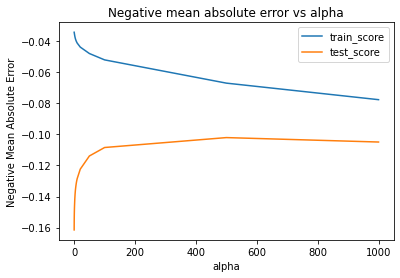

In [58]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title('Negative mean absolute error vs alpha')
plt.legend(['train_score','test_score'],loc = 'upper_left')
plt.show()

In [59]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [60]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.63523427e-03 -6.69650181e-04  1.39816858e-02  7.58820947e-03
  1.14435071e-02  4.63274816e-03  3.51916072e-03  1.71452538e-02
  2.59878159e-02  1.41066650e-02 -5.63718715e-04  3.07853958e-02
  1.40955727e-02  1.04263541e-02  4.06115297e-03 -6.83106405e-04
  5.20875147e-03  7.80124704e-03 -6.99688963e-03 -5.18724441e-04
  3.84993920e-04 -1.51653158e-02 -2.93364633e-03 -1.36669267e-03
  4.76810061e-05  1.35446390e-03  6.66246169e-03  2.61363456e-03
 -2.02909482e-03 -9.01580185e-06 -1.25754609e-04 -2.62504541e-03
 -8.72358201e-03 -4.99222417e-03 -3.54243835e-03  6.10788252e-03
 -1.75924363e-04  1.14164176e-02 -6.21865238e-03  3.12658734e-03
  2.30951392e-03  3.97050151e-03  2.68115342e-03 -5.21278343e-03
  2.64546590e-05  2.63873134e-03  2.23719069e-03  4.92085196e-03
 -2.67683554e-03  7.94784934e-03 -3.76432559e-03 -9.55647011e-04
 -2.38810502e-03  3.35563829e-03 -5.49679963e-04  7.47535009e-04
 -4.59772759e-03  1.01730318e-03  8.55995375e-03 -2.78796193e-03
  1.57323156e-02 -1.21847

In [61]:
# checking coeffients of features
model_parameters = list(ridge.coef_)
model_parameters.insert(0,ridge.intercept_)
model_parameters = [round(x,3)for x in model_parameters]
cols = X.columns
cols = cols.insert(0,"constant")
sorted(list(zip(model_parameters,cols)),key=lambda x:abs(x[0]),reverse=True)

[(12.023, 'constant'),
 (0.031, 'GrLivArea'),
 (0.026, '1stFlrSF'),
 (0.023, 'OverallQual_9'),
 (-0.021, 'Condition2_PosN'),
 (0.018, 'OverallQual_8'),
 (0.017, 'TotalBsmtSF'),
 (-0.017, 'OverallQual_2'),
 (0.017, 'GarageCars_3'),
 (0.016, 'Neighborhood_Crawfor'),
 (0.016, 'Neighborhood_NridgHt'),
 (0.016, 'CentralAir_Y'),
 (0.016, 'FullBath_3'),
 (-0.015, 'MSSubClass_30'),
 (0.014, 'LotArea'),
 (0.014, '2ndFlrSF'),
 (0.014, 'GarageArea'),
 (-0.014, 'OverallQual_4'),
 (0.014, 'BsmtExposure_Gd'),
 (0.014, 'Fireplaces_2'),
 (-0.013, 'OverallCond_3'),
 (0.013, 'BsmtFullBath_1'),
 (0.013, 'HalfBath_1'),
 (-0.013, 'KitchenQual_TA'),
 (-0.013, 'FireplaceQu_No Fireplace'),
 (-0.012, 'Neighborhood_Edwards'),
 (-0.012, 'Neighborhood_IDOTRR'),
 (-0.012, 'ExterQual_TA'),
 (-0.012, 'BsmtFinType1_Unf'),
 (-0.012, 'TotRmsAbvGrd_4'),
 (0.012, 'TotRmsAbvGrd_10'),
 (0.011, 'BsmtFinSF1'),
 (0.011, 'MSZoning_RL'),
 (-0.011, 'Neighborhood_MeadowV'),
 (0.011, 'Neighborhood_NoRidge'),
 (-0.011, 'BsmtQual_TA

In [62]:
from sklearn.metrics import r2_score, mean_squared_error

In [63]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.9371491718363263
0.8675683361506158
10.087070342361889
9.544160773977861
0.009879598768229077
0.02179032140177594


### Lasso Regression

In [64]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [65]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.299538,0.028247,0.004986,0.000622,0.0001,{'alpha': 0.0001},-0.117439,-0.134349,-0.123836,-0.136430,...,-0.127822,0.006942,3,-0.036258,-0.036662,-0.038046,-0.036606,-0.036379,-0.036790,0.000645
1,0.241155,0.038506,0.006590,0.001196,0.001,{'alpha': 0.001},-0.097108,-0.106156,-0.105491,-0.105998,...,-0.100756,0.006782,2,-0.049536,-0.048629,-0.050847,-0.050418,-0.050784,-0.050043,0.000848
2,0.022739,0.002475,0.005785,0.001163,0.01,{'alpha': 0.01},-0.095425,-0.102419,-0.111144,-0.089248,...,-0.098116,0.007841,1,-0.084411,-0.078054,-0.083036,-0.085328,-0.087411,-0.083648,0.003138
3,0.016356,0.001620,0.005586,0.001353,0.05,{'alpha': 0.05},-0.130178,-0.141879,-0.139239,-0.125164,...,-0.134576,0.006106,4,-0.133230,-0.125115,-0.129232,-0.134124,-0.134909,-0.131322,0.003668
4,0.014761,0.001466,0.006383,0.001017,0.1,{'alpha': 0.1},-0.174445,-0.183192,-0.176072,-0.165060,...,-0.176111,0.006438,5,-0.174870,-0.168321,-0.173674,-0.175986,-0.177670,-0.174104,0.003177


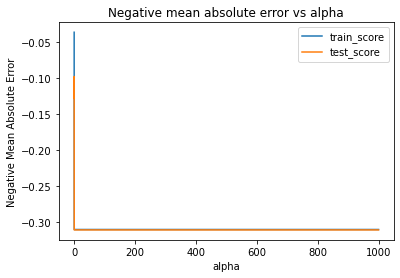

In [66]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title('Negative mean absolute error vs alpha')
plt.legend(['train_score','test_score'],loc = 'upper_left')
plt.show()

In [67]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [68]:
#Fitting Ridge model for alpha = 0.01 and printing coefficients which have been penalised

alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [69]:
lasso.coef_

array([-0.00000000e+00, -0.00000000e+00,  8.74613427e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  3.50948727e-02,
        5.60953003e-03,  0.00000000e+00, -1.11417908e-03,  1.24278858e-01,
        3.22268755e-02,  6.91418745e-03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  1.01827851e-03, -7.87089916e-03,  0.00000000e+00,
        0.00000000e+00, -2.02034959e-02, -0.00000000e+00, -0.00000000e+00,
       -1.44264730e-03,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -6.79976894e-04, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  7.65252539e-03, -9.43876599e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.19953325e-04,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  8.39799425e-03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [70]:
# checking coeffients of features
model_parameters = list(lasso.coef_)
model_parameters.insert(0,lasso.intercept_)
model_parameters = [round(x,3)for x in model_parameters]
cols = X.columns
cols = cols.insert(0,"constant")
sorted(list(zip(model_parameters,cols)),key=lambda x:abs(x[0]),reverse=True)

[(12.023, 'constant'),
 (0.124, 'GrLivArea'),
 (0.035, 'TotalBsmtSF'),
 (0.033, 'OverallQual_9'),
 (0.032, 'GarageArea'),
 (-0.031, 'Condition2_PosN'),
 (0.029, 'OverallQual_8'),
 (0.027, 'CentralAir_Y'),
 (-0.027, 'FireplaceQu_No Fireplace'),
 (-0.021, 'ExterQual_TA'),
 (-0.02, 'MSSubClass_30'),
 (0.019, 'BsmtExposure_Gd'),
 (0.018, 'BsmtFinType1_GLQ'),
 (-0.017, 'OverallCond_3'),
 (-0.016, 'OverallQual_4'),
 (0.016, 'GarageCars_3'),
 (-0.014, 'OverallQual_2'),
 (0.014, 'BsmtFullBath_1'),
 (-0.014, 'KitchenQual_TA'),
 (-0.013, 'Neighborhood_Edwards'),
 (0.013, 'Neighborhood_NridgHt'),
 (0.013, 'Condition1_Norm'),
 (-0.013, 'ExterQual_Fa'),
 (0.013, 'GarageType_Attchd'),
 (0.012, 'Neighborhood_Crawfor'),
 (0.012, 'OverallQual_7'),
 (0.011, 'Neighborhood_Somerst'),
 (0.011, 'Foundation_PConc'),
 (0.011, 'FullBath_3'),
 (0.011, 'KitchenAbvGr_1'),
 (-0.011, 'Fireplaces_3'),
 (-0.011, 'GarageFinish_Unf'),
 (-0.01, 'BsmtQual_TA'),
 (0.01, 'HalfBath_1'),
 (0.01, 'GarageCond_TA'),
 (0.009, 'L

In [71]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8989873680996501
0.8495056480765443
16.211743794250438
10.845912892604229
0.01587829950465273
0.02476235820229276


In [72]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric1, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.937149,0.898987
1,R2 Score (Test),0.867568,0.849506
2,RSS (Train),10.087070,16.211744
3,RSS (Test),9.544161,10.845913
4,MSE (Train),0.099396,0.126009
5,MSE (Test),0.147615,0.157361


In [73]:
#Fitting Ridge model for alpha = 1000 and printing coefficients which have been penalised
alpha_double = 1000
ridge = Ridge(alpha=alpha_double)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.61898644e-03  1.00593266e-03  1.12111629e-02  8.85012417e-03
  1.12724369e-02  3.89470938e-03  3.63914096e-03  1.68168571e-02
  2.24496630e-02  1.17163783e-02 -5.90603837e-04  2.61942790e-02
  1.47360175e-02  9.94785716e-03  4.79381936e-03 -9.73586140e-04
  4.13875256e-03  6.31282561e-03 -4.32320632e-03 -3.12842630e-04
  5.33181488e-04 -1.36392068e-02 -1.80707284e-03 -1.05337744e-03
 -3.99471536e-04  3.74714100e-03  5.91453033e-03  1.78163603e-03
 -1.25923810e-03 -2.40390265e-04 -5.36960633e-04 -1.53168282e-03
 -6.99686008e-03 -4.75596603e-03 -2.65015529e-03  4.87339193e-03
 -1.35390359e-04  9.47000198e-03 -7.37777842e-03  2.84035154e-03
  2.22315739e-03  2.96577444e-03  2.71992654e-03 -4.53221847e-03
 -2.59375563e-03  2.58839947e-03  2.56472229e-03  2.75951633e-03
 -2.32974641e-03  6.82889634e-03 -2.58171555e-03 -2.74844564e-04
 -2.26339771e-03  2.63606739e-03  6.56560819e-05  5.02970788e-04
 -4.39256243e-03  1.08922016e-04  6.61778932e-03 -2.35637108e-03
  1.21939943e-02 -1.04650

In [74]:
# checking coeffients of features
model_parameters = list(ridge.coef_)
model_parameters.insert(0,ridge.intercept_)
model_parameters = [round(x,3)for x in model_parameters]
cols = X.columns
cols = cols.insert(0,"constant")
sorted(list(zip(model_parameters,cols)),key=lambda x:abs(x[0]),reverse=True)

[(12.023, 'constant'),
 (0.026, 'GrLivArea'),
 (0.022, '1stFlrSF'),
 (0.018, 'OverallQual_9'),
 (0.017, 'TotalBsmtSF'),
 (0.016, 'OverallQual_8'),
 (0.016, 'GarageCars_3'),
 (0.015, 'GarageArea'),
 (-0.014, 'MSSubClass_30'),
 (0.014, 'Neighborhood_NridgHt'),
 (-0.014, 'Condition2_PosN'),
 (0.014, 'FullBath_3'),
 (-0.013, 'OverallQual_2'),
 (0.013, 'CentralAir_Y'),
 (0.013, 'Fireplaces_2'),
 (-0.013, 'FireplaceQu_No Fireplace'),
 (0.012, '2ndFlrSF'),
 (0.012, 'Neighborhood_Crawfor'),
 (-0.012, 'OverallQual_4'),
 (0.012, 'BsmtExposure_Gd'),
 (-0.012, 'KitchenQual_TA'),
 (0.011, 'LotArea'),
 (0.011, 'BsmtFinSF1'),
 (-0.011, 'ExterQual_TA'),
 (0.011, 'BsmtFinType1_GLQ'),
 (0.011, 'BsmtFullBath_1'),
 (-0.011, 'FullBath_1'),
 (0.011, 'HalfBath_1'),
 (0.011, 'TotRmsAbvGrd_10'),
 (0.01, 'WoodDeckSF'),
 (-0.01, 'Neighborhood_Edwards'),
 (-0.01, 'Neighborhood_IDOTRR'),
 (0.01, 'Neighborhood_NoRidge'),
 (-0.01, 'OverallCond_3'),
 (-0.01, 'BsmtQual_TA'),
 (-0.01, 'TotRmsAbvGrd_4'),
 (-0.01, 'TotRm

In [75]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9194898096159762
0.8627656345851922
12.921260982683087
9.890284612925996
0.012655495575595579
0.02258055847699999


In [76]:
#Fitting Ridge model for alpha = 0.02 and printing coefficients which have been penalised

alpha =0.02

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.02)

In [77]:
# checking coeffients of features
model_parameters = list(lasso.coef_)
model_parameters.insert(0,lasso.intercept_)
model_parameters = [round(x,3)for x in model_parameters]
cols = X.columns
cols = cols.insert(0,"constant")
sorted(list(zip(model_parameters,cols)),key=lambda x:abs(x[0]),reverse=True)

[(12.023, 'constant'),
 (0.122, 'GrLivArea'),
 (0.044, 'GarageArea'),
 (0.038, 'TotalBsmtSF'),
 (0.032, 'CentralAir_Y'),
 (-0.032, 'FireplaceQu_No Fireplace'),
 (-0.025, 'ExterQual_TA'),
 (0.024, 'OverallQual_9'),
 (0.022, 'BsmtFinType1_GLQ'),
 (0.021, 'OverallQual_8'),
 (-0.019, 'MSZoning_RM'),
 (-0.019, 'KitchenQual_TA'),
 (0.017, 'GarageType_Attchd'),
 (-0.016, 'MSSubClass_30'),
 (0.016, 'GarageCars_3'),
 (0.015, 'Foundation_PConc'),
 (-0.015, 'GarageFinish_Unf'),
 (-0.014, 'OverallQual_4'),
 (0.014, 'BsmtExposure_Gd'),
 (-0.013, 'Condition2_PosN'),
 (-0.012, 'BsmtQual_TA'),
 (-0.011, 'OverallCond_3'),
 (-0.009, 'Neighborhood_Edwards'),
 (0.008, 'Neighborhood_NridgHt'),
 (0.008, 'Condition1_Norm'),
 (0.008, 'KitchenAbvGr_1'),
 (-0.006, 'Neighborhood_IDOTRR'),
 (-0.006, 'ExterQual_Fa'),
 (-0.006, 'HeatingQC_TA'),
 (0.006, 'BsmtFullBath_1'),
 (0.006, 'GarageCond_TA'),
 (0.005, 'Neighborhood_Crawfor'),
 (-0.005, 'OverallQual_2'),
 (0.005, 'Fireplaces_2'),
 (0.004, 'OverallQual_7'),
 (0

In [78]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.8531728518457637
0.8274187106109855
23.56461823769869
12.437686914380734
0.023079939508030056
0.02839654546662268


In [79]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric1, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')
rgd_metric = pd.Series(metric3, name = 'Ridge Regression with double Alpha')
lsd_metric = pd.Series(metric4, name = 'Lasso Regression with double Alpha')

final_metric = pd.concat([metric, rg_metric, ls_metric, rgd_metric, lsd_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression,Ridge Regression with double Alpha,Lasso Regression with double Alpha
0,R2 Score (Train),0.937149,0.898987,0.919490,0.853173
1,R2 Score (Test),0.867568,0.849506,0.862766,0.827419
2,RSS (Train),10.087070,16.211744,12.921261,23.564618
3,RSS (Test),9.544161,10.845913,9.890285,12.437687
4,MSE (Train),0.099396,0.126009,0.112497,0.151921
5,MSE (Test),0.147615,0.157361,0.150268,0.168513


In [80]:
#Removing top 5 variables from lasso for Q3
X_train_Q3 = X_train.drop(['GrLivArea','TotalBsmtSF','OverallQual_9','GarageArea','Condition2_PosN'],axis=1)

In [81]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_Q3, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [82]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [83]:
#Fitting Ridge model for alpha = 0.01 and printing coefficients which have been penalised

alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_Q3, y_train)

Lasso(alpha=0.01)

In [84]:
# checking coeffients of features
model_parameters = list(lasso.coef_)
model_parameters.insert(0,lasso.intercept_)
model_parameters = [round(x,3)for x in model_parameters]
cols = X.columns
cols = cols.insert(0,"constant")
sorted(list(zip(model_parameters,cols)),key=lambda x:abs(x[0]),reverse=True)

[(12.022, 'constant'),
 (0.111, 'TotalBsmtSF'),
 (0.073, '1stFlrSF'),
 (0.036, 'GarageFinish_No Garage'),
 (-0.028, 'MasVnrType_BrkFace'),
 (0.026, 'Neighborhood_NPkVill'),
 (0.026, 'Heating_Wall'),
 (-0.026, 'Fireplaces_1'),
 (-0.024, 'PoolArea'),
 (0.021, 'OverallQual_4'),
 (0.02, 'BsmtExposure_Gd'),
 (-0.02, 'BsmtFullBath_1'),
 (0.019, 'BsmtQual_TA'),
 (0.019, 'BsmtHalfBath_1'),
 (-0.018, 'HouseStyle_SFoyer'),
 (-0.017, 'OverallQual_7'),
 (-0.016, 'HouseStyle_2.5Unf'),
 (-0.016, 'KitchenAbvGr_1'),
 (-0.015, 'Neighborhood_ClearCr'),
 (0.015, 'CentralAir_Y'),
 (0.014, 'Neighborhood_SWISU'),
 (0.014, 'Neighborhood_Timber'),
 (-0.014, 'GarageYrBlt_2010.0'),
 (0.013, 'Neighborhood_BrkSide'),
 (-0.012, 'MSZoning_FV'),
 (0.012, 'ExterCond_Fa'),
 (0.012, 'BedroomAbvGr_3'),
 (0.012, 'GarageQual_TA'),
 (0.011, 'LotArea'),
 (-0.011, 'Exterior2nd_Wd Sdng'),
 (0.011, 'BsmtFullBath_3'),
 (0.011, 'FireplaceQu_Fa'),
 (0.01, 'LowQualFinSF'),
 (0.01, 'LandContour_Low'),
 (-0.01, 'Condition2_RRAn'),
 

In [85]:
X_test_Q3 = X_test.drop(['GrLivArea','TotalBsmtSF','OverallQual_9','GarageArea','Condition2_PosN'],axis=1)

In [86]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_Q3)
y_pred_test = lasso.predict(X_test_Q3)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

0.8873889423627028
0.85628153963024
18.073201147916112
10.35758407081233
0.017701470272199916
0.023647452216466507
